# **Binar Academy: Challenge 2**

**DAFTAR ISI:**

**1. Domain Proyek** 

Berisi Latar Belakang dan alasan masalah tersebut harus diselesaikan.

**2. Business Understanding** 

Berisi Problem Statement, Goals, dan Solution Statement.

**3. Data Understanding**

Berisi tentang penjelasan informasi dari data yang digunakan.

**4. Data Preparation**

Berisi tentang teknik persiapan data sebelum modeling.

**5. Modeling** 

Berisi tentang model ML yang digunakan untuk memecahkan masalah.

**6. Evaluasi**

Berisi tentang penjelasan metriks evaluasi yang digunakan.


# **1. Domain Proyek**

**- Tema : Bisnis (Telekomunikasi)**

**- Judul : Prediksi customer churn menggunakan Logistic Regression, KNN, dan Random Forest**

**- Latar Belakang**

Perkembangan industri telekomunikasi sangatlah
cepat, hal ini dapat dilihat dari perilaku masyarakat
yang menggunakan internet dalam berkomunikasi.
Perilaku ini menyebabkan banyaknya perusahaan
telekomunikasi dan meningkatnya internet service
provider yang dapat menimbulkan persaingan
antar provider.

Pelanggan memiliki hak dalam memilih provider
yang sesuai dan dapat beralih dari provider
sebelumnya yang diartikan sebagai **Customer
Churn.**

**- Alasan Penyeleasian Masalah**

Peralihan konsumen ke produk lain dapat menyebabkan berkurangnya
pendapatan bagi perusahaan telekomunikasi. Selain itu, peralihan konsumen dapat menyebabkan citra suatu perusahaan dipandang kalah saing dibanding dengan produk serupa karena kualitas suatu produk biasanya dilihat dari review pengguna sebelumnya. Oleh karena itu, masalah customer churn penting untuk ditangani.


# **2. Business Understanding**

**- Problem Statement**

1. Bagaimana cara mendeteksi konsumen yang akan meninggalkan produk dan beralih ke produk lain (customer churn)?

**- Goals**

1. Diperlukan suatu sistem yang dapat memprediksi apakah konsumen akan berpaling dari produk berdasarkan aktivitasnya agar dapat segera ditangani dan membuat konsumen tetap pada produk perusahaan.

**- Solution Statement**

1. Untuk membuat sistem prediksi kali ini, digunakan 3 algoritma sebagai perbandingan yaitu Logistic Regression, KNN, dan Random Forest. Untuk menentukan algoritma yang lebih baik, saya menggunakan metriks evaluasi yaitu F1 Score dan akurasi. Saya memilih F1 Score karena dataset yang dimiliki memiliki jumlah kelas yang imabalanced atau tidak seimbang dan F1 Score menggunakan semua matriks prediksi sehingga hasil yang didapatkan lebih dapat dipercaya. Akurasi dipilih karena merupakan metde evaluasi yang umum dan dapat mencakup seluruh nilai pada confusion matrix.

# **3. Data Understanding**

3.1. Loading Data

3.2. EDA-Deskripsi Variabel

3.3. EDA-Univariate Analysis

3.4. EDA-Multivariate Analysis

# **3.1. Loading Data**

**- Import Package yang digunakan**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

**- Membaca data CSV dan mengubahnya menjadi DataFrame**

In [ ]:
#URL untuk masing-masing dataset train dan test
url_train = 'https://raw.githubusercontent.com/jonywony/Binar_Study_Case/main/Challenge%202/Dataset/train.csv'
url_test = 'https://raw.githubusercontent.com/jonywony/Binar_Study_Case/main/Challenge%202/Dataset/test.csv'

#Membaca csv sebagai dataframe
df_train = pd.read_csv(url_train, header=0)
df_test = pd.read_csv(url_test, header=0)

#Membuang kolom id pada data test
df_test.drop(columns=['id'], inplace=True)

In [ ]:
#Melihat preview data train
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
#Melihat preview data test
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


# **3.2 EDA-Deskripsi Variabel**

In [ ]:
#Mengecek informasi tentang data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#Mengecek informasi tentang data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    object 
 4   voice_mail_plan                750 non-null    object 
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

Kolom yang ada pada dataset adalah:

1. **state** : Data Kategorik, tidak ada missing value
2. **account_length** : Data Numerik, tidak ada missing value
3. **area_code** : Data Kategorik, tidak ada missing value
4. **international_plan** : Data Kategorik, tidak ada missing value
5. **voice_mail_plan** : Data Kategorik, tidak ada missing value
6. **number_vmail_messages** : Data Numerik, tidak ada missing value
7. **total_day_minutes** : Data Numerik, tidak ada missing value
8. **total_day_calls** : Data Numerik, tidak ada missing value
9. **total_day_charge** : Data Numerik, tidak ada missing value
10. **total_eve_minutes** : Data Numerik, tidak ada missing value
11. **total_eve_calls** : Data Numerik, tidak ada missing value
12. **total_eve_charge** : Data Numerik, tidak ada missing value
13. **total_night_minutes** : Data Numerik, tidak ada missing value
14.  **total_night_calls** : Data Numerik, tidak ada missing value
15.  **total_night_charge** : Data Numerik, tidak ada missing value
16.  **total_intl_minutes** : Data Numerik, tidak ada missing value
17.  **total_intl_calls** : Data Numerik, tidak ada missing value
18.  **total_intl_charge** : Data Numerik, tidak ada missing value
19.  **number_customer_service_calls** : Data Numerik, tidak ada missing value
20.  **churn** : Data Kategorik, tidak ada missing value

In [ ]:
#Menjabarkan data numerik pada data train
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Menjabarkan data numerik pada data test
df_test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


Pada data kali ini, terdapat data kategorik dan numerik. Data kategorik bersifat diskrit dan mewakili suatu kategori sementara data numerik biasanya bersifat kontinu dan mewakili angka.
- **Data Kategorik**

1. **state**
3. **area_code**
4. **international_plan**
5. **voice_mail_plan** 
20.  **churn**

- **Data Numerik**
1. **account_length**
6. **number_vmail_messages**
7. **total_day_minutes**
8. **total_day_calls**
9. **total_day_charge**
10. **total_eve_minutes**
11. **total_eve_calls**
12. **total_eve_charge**
13. **total_night_minutes**
14.  **total_night_calls**
15.  **total_night_charge**
16.  **total_intl_minutes**
17.  **total_intl_calls**
18.  **total_intl_charge**
19.  **number_customer_service_calls**


In [ ]:
#Memisahkan data train menjadi data numerik dan kategorik
cat_features_train = df_train.select_dtypes(include=['object']).columns.to_list()
num_features_train = df_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [ ]:
#Mendefinisikan dependent variable atau target variabel
df_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

**Dependent variable** pada kasus kali ini adalah **churn** dimana kolom ini mengidentifikasi apakah konsumen merupakan customer churn atau bukan. Nilai yang ada pada kolom churn memiliki 2 nilai yaitu 'yes' atau 'no'. Hal ini berarti kasus klasifikasi kali ini diselesaikan menggunakan **binary classification** dengan output antara 2 nilai 'yes' atau 'no'.

In [ ]:
#Mengubah nilai pada churn sehingga menjadi numerik
df_train['churn'] = df_train['churn'].map({'yes':1, 'no':0})

# **3.3 EDA-Univariate Analysis**

Univariate analysis adalah sebuah analisis yang dilakukan terhadap masing-masing variabel untuk mengetahui persebaran data dan informasi pada data itu sendiri. Univariate analysis dipisahkan berdasarkan data numerik dan data kategorik

- **Fitur Kategorik**


jumlah unique value: 51


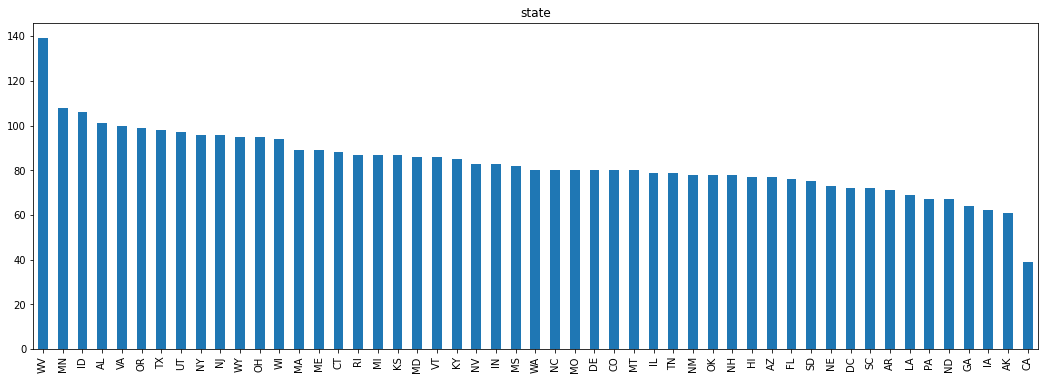

In [ ]:
feature = cat_features_train[0]
count = df_train[feature].value_counts()
print('jumlah unique value:', df_train[feature].nunique())
plt.figure(figsize=(18,6))
count.plot(kind='bar', title=feature);

In [ ]:
#Menghilangkan kolom state karena memiliki kardinalitas tinggi
df_train.drop(['state'], axis=1, inplace=True)
df_test.drop(['state'], axis=1, inplace=True)

jumlah unique value: 3


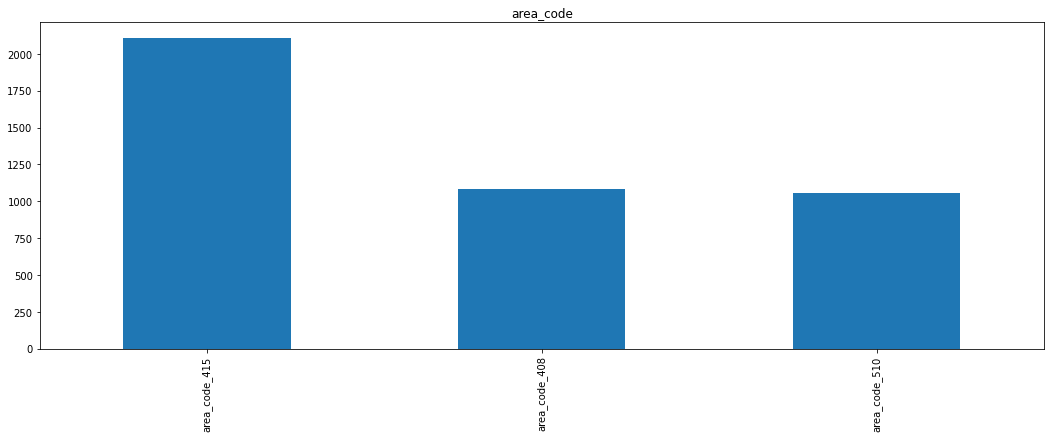

In [ ]:
feature = cat_features_train[1]
count = df_train[feature].value_counts()
print('jumlah unique value:', df_train[feature].nunique())
plt.figure(figsize=(18,6))
count.plot(kind='bar', title=feature);

jumlah unique value: 2


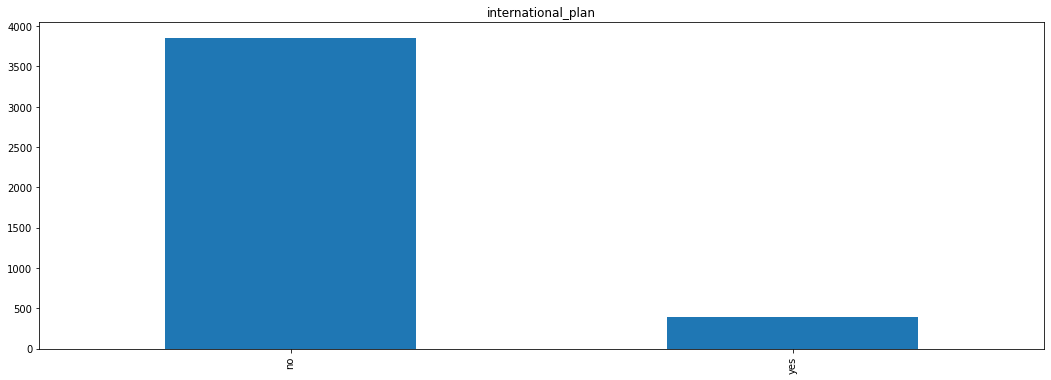

In [ ]:
feature = cat_features_train[2]
count = df_train[feature].value_counts()
print('jumlah unique value:', df_train[feature].nunique())
plt.figure(figsize=(18,6))
count.plot(kind='bar', title=feature);

jumlah unique value: 2


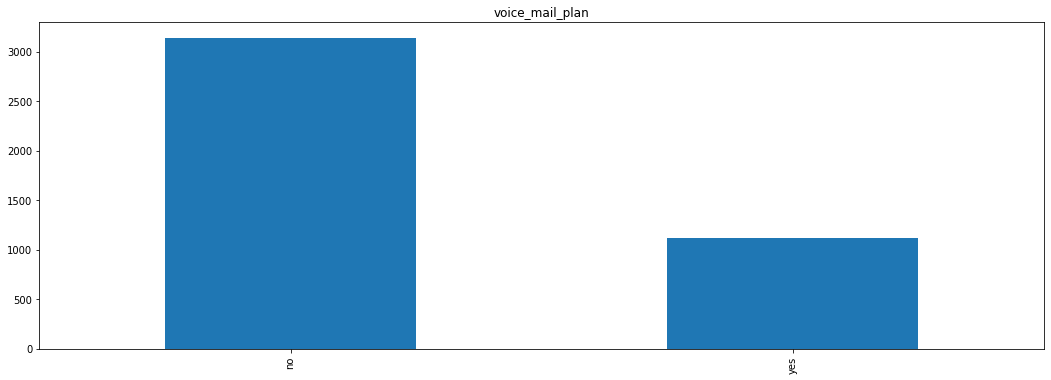

In [ ]:
feature = cat_features_train[3]
count = df_train[feature].value_counts()
print('jumlah unique value:', df_train[feature].nunique())
plt.figure(figsize=(18,6))
count.plot(kind='bar', title=feature);

jumlah unique value: 2


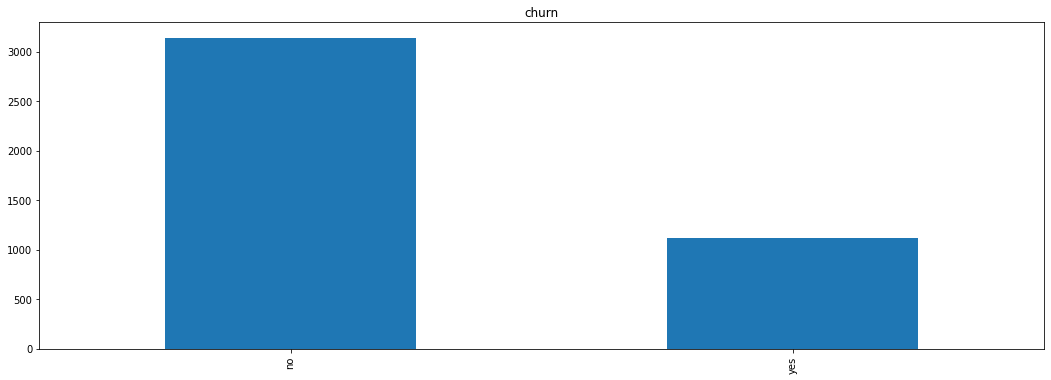

In [ ]:
feature = cat_features_train[4]
print('jumlah unique value:', df_train[feature].nunique())
plt.figure(figsize=(18,6))
count.plot(kind='bar', title=feature);

Kolom state akan di drop karena memiliki kardinalitas tinggi(memiliki banyak nilai dalam kolom)

In [ ]:
#Mengeluarkan kolom state
cat_features_train.remove('state')

- **Fitur Numerik**

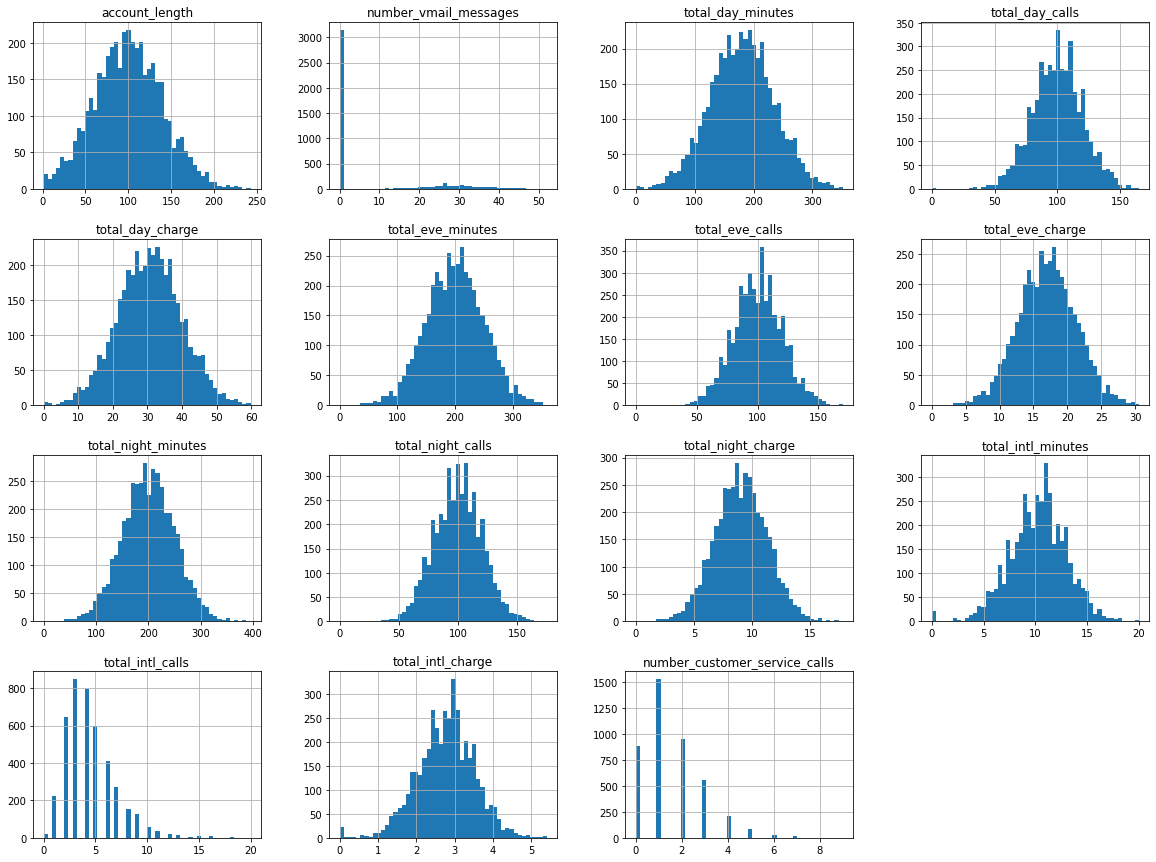

In [ ]:
#Melihat persebaran data numerik
df_train[num_features_train].hist(bins=50, figsize=(20,15))
plt.show()

Dapat dilihat bahwa hampir seluruh data numerik memiliki sebaran mendekati normal kecuali beberapa kolom seperti total_intl_calls, number_customer_service_calls, dan number_vmail_messages

# **3.4. EDA-Multivariate Analysis**

Multivariate analysis adalah analisis yang dilakukan terhadap masing-masing variabel untuk mengetahui persebaran data dan informasi pada data dengan label. multivariate analysis dipisahkan berdasarkan data numerik dan data kategorik

- **Fitur Kategorik**

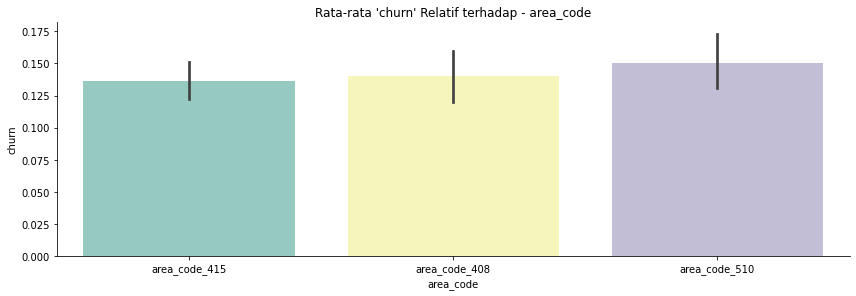

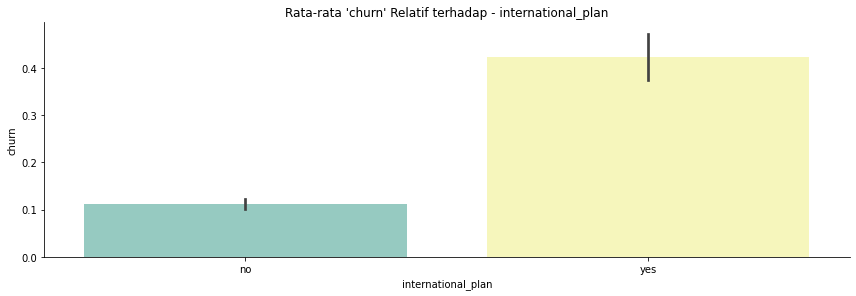

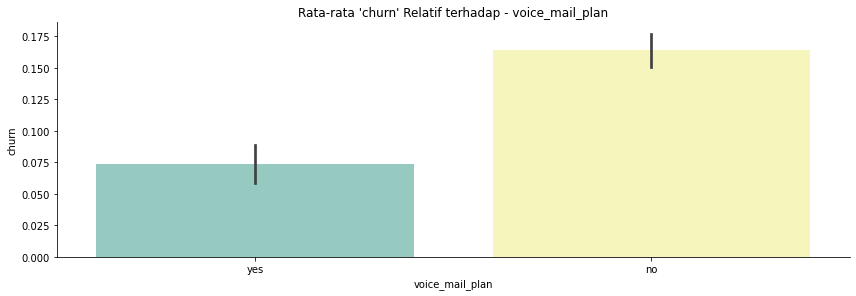

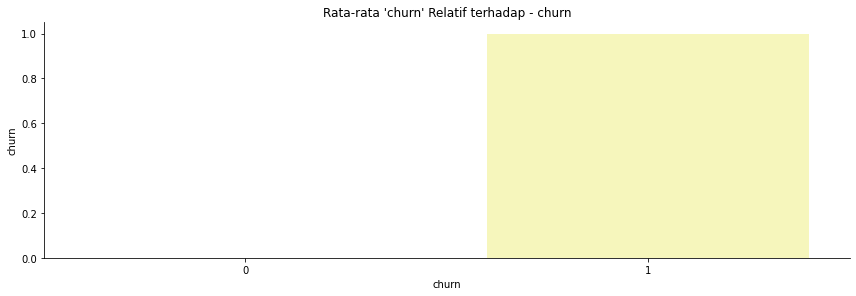

In [ ]:
#Melakukan visualisasi kolom kategorik terhadap churn
for col in cat_features_train:
  sns.catplot(x=col, y="churn", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_train, palette="Set3")
  plt.title("Rata-rata 'churn' Relatif terhadap - {}".format(col))

Pada kolom area_code masing-masing nilai memiliki rata-rata yang hampir sama terhadap kolom churn. Pada kolom international_plan, nilai yes memiliki rata-rata lebih tinggi dibanding dengan no. Pada kolom voice_mail_plan, nilai no memiliki rata-rata lebih tingi dibandng nilai yes.

- **Fitur Numerik**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

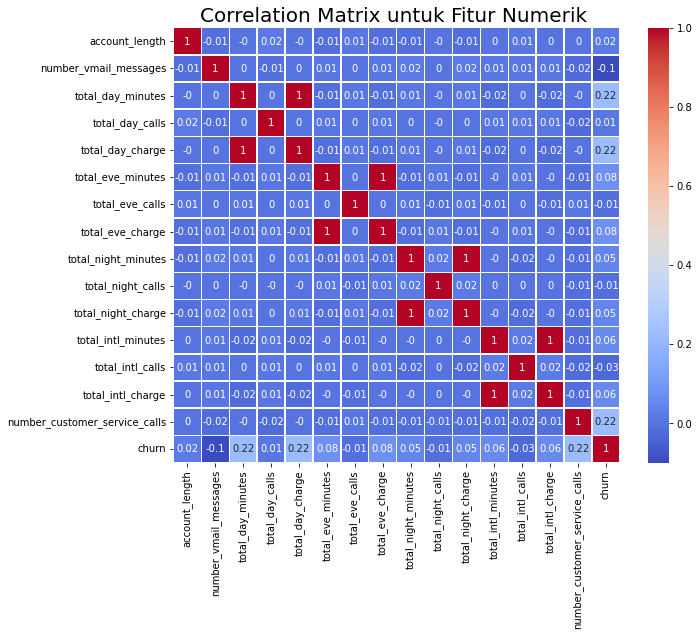

In [ ]:
#menambahkan kolom churn kedalam kategori numerik
num_features_train.append('churn')

#Menset besar figure
plt.figure(figsize=(10, 8))

#Melakukan perhitungan korelasi
correlation_matrix = df_train[num_features_train].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Kolom yang memiliki akhiran minutes selalu berkorelasi mutlak dengan kolom yang memiliki akhiran charge sehingga hanya akan diambil salah satu saja pada feature engineering. Kolom dengan akhiran minutes, charge, calls dapat disatukan (total)

# **4. Data Preparation**

- **Penanganan Missing Value**

In [ ]:
#Mengecek apakah ada missing value dalam data
df_train.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak ada missing value yang terdeteksi sehingga akan dilanjutkan dengan proses berikutnya.

- **Penanganan Outlier**

In [ ]:
num_features_train

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

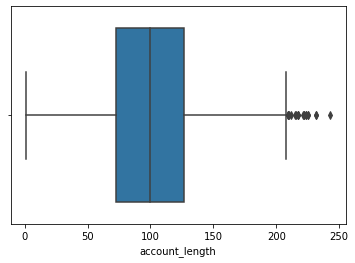

In [ ]:
#Mengecek apakah ada outlier 
sns.boxplot(x=df_train['account_length'])

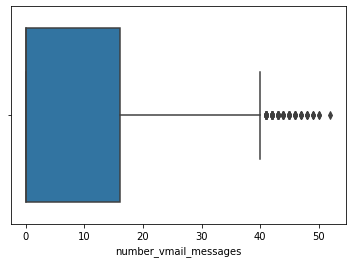

In [ ]:
#Mengecek apakah ada outlier 
sns.boxplot(x=df_train['number_vmail_messages'])

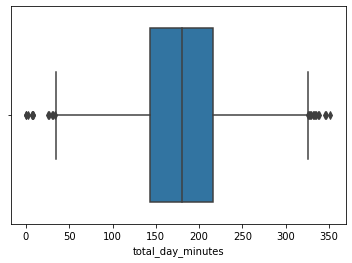

In [ ]:
#Mengecek apakah ada outlier 
sns.boxplot(x=df_train['total_day_minutes'])

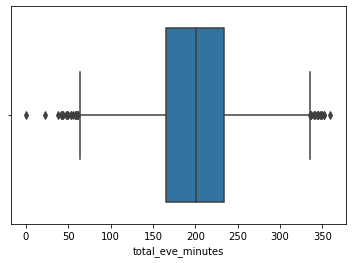

In [ ]:
#Mengecek apakah ada outlier 
sns.boxplot(x=df_train['total_eve_minutes'])

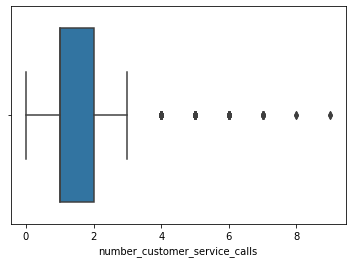

In [ ]:
#Mengecek apakah ada outlier 
sns.boxplot(x=df_train['number_customer_service_calls'])

In [ ]:
#Mengeluarkan kolom churn dari num-features_train
num_features_train.remove('churn')
#Menghitung Interquartile Range sebagai acuan untuk menghapus outlier
Q1 = df_train[num_features_train].quantile(0.25)
Q3 = df_train[num_features_train].quantile(0.75)
IQR=Q3-Q1

#Melakukan subset dan menghapus data outlier
df_train[num_features_train]=df_train[num_features_train][~((df_train[num_features_train]<(Q1-1.5*IQR))|(df_train[num_features_train]>(Q3+1.5*IQR))).any(axis=1)]

#Cek ukuran dataset setelah proses drop outliers
df_train.dropna(axis=0, inplace=True)
df_train.shape

(3515, 19)

Dari 5 contoh kolom yang divisualisasikan, dapat diambil kesimpulan bahwa ada beberapa kolom yang memiliki outlier dan perlu ditangani. Metode penanganan outlier yang digunakan adalah IQR method yang akan mengelompokan outlier berdasarkan IQR. Data yang ada terdeuksi dari 4250 menjadi 3515.

- **Penanganan Duplikat**

In [ ]:
#Mengecek apakah ada kolom yang memiliki duplikat
len(df_train[df_train.duplicated()])

0

Karena tidak ada data yang duplikat, akan dilanjutkan ke feature engineering

- **Feature Engineering**

In [ ]:
#Mengubah fitur yang memiliki akhiran minutes, amount, dan charge pada data train
df_train['total_charge_amount'] = df_train['total_day_charge'] + df_train['total_eve_charge'] + df_train['total_night_charge']+ df_train['total_intl_charge']
df_train['total_call_minutes'] = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes'] + df_train['total_intl_minutes']
df_train['total_number_calls'] = df_train['total_day_calls'] + df_train['total_eve_calls'] + df_train['total_night_calls'] + df_train['total_intl_calls'] 

In [ ]:
#Mengubah fitur yang memiliki akhiran minutes, amount, dan charge pada data test
df_test['total_charge_amount'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']+ df_test['total_intl_charge']
df_test['total_call_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes'] + df_test['total_intl_minutes']
df_test['total_number_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls'] + df_test['total_intl_calls'] 

In [ ]:
#Melakukan label encoding pad akolom international_plan
df_train['international_plan'].replace(['no','yes'],[0,1],inplace=True)
df_test['international_plan'].replace(['no','yes'],[0,1],inplace=True)
df_train['international_plan'].value_counts()

0    3195
1     320
Name: international_plan, dtype: int64

In [ ]:
#Melakukan label encoding pad akolom international_plan
df_train['voice_mail_plan'].replace(['no','yes'],[0,1],inplace=True)
df_test['voice_mail_plan'].replace(['no','yes'],[0,1],inplace=True)
df_train['voice_mail_plan'].value_counts()

0    2640
1     875
Name: voice_mail_plan, dtype: int64

Feature engineering dilakukan untuk mengubah fitur yang ada agar dapat masuk ke dalam algoritma yang ingin dibuat. Kolom yang memiliki akhiran minutes, charge, dan calls dapat ditambahkan menjadi satu karena memiliki kesatuan yang sama. Kolom voice_mail_plan dan international_plan juga diubah menjadi boolean dengan nila 1 atau 0.

- **Feature Selection**

In [ ]:
#Menghapus kolom yang telah dilakukan feature engineering sebelumnya
df_train.drop(['area_code', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge'], axis=1, inplace=True)
df_test.drop(['area_code', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge'], axis=1, inplace=True)

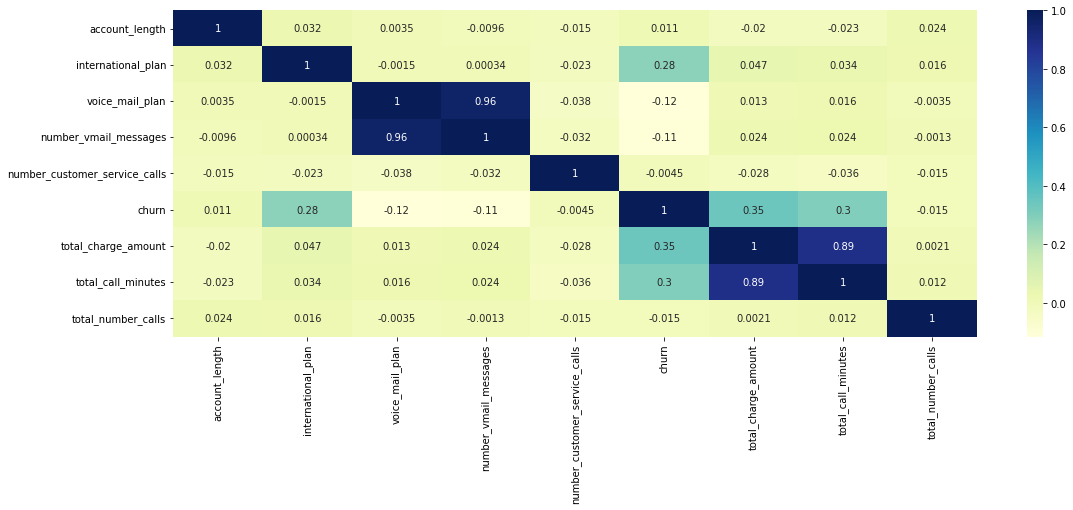

In [ ]:
#Menggambarkan korelasi pada setiap fitur
plt.figure(figsize=(18,6))
sns.heatmap(df_train.corr(),cmap="YlGnBu", annot = True)

Feature selection dilakukan dengan menghapus kolom yang telah dilakukan feature engineering sebelumnya.

- **Train-Test Split**

In [ ]:
#Membagi dataset menjadi data training dan data latih
from sklearn.model_selection import train_test_split

#Membagi dataset dengan perbandingan 8:2 untuk data training dan data test berturut-turut
X = df_train.drop(["churn"],axis =1)
Y = df_train["churn"].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [ ]:
#Mencetak nilai pada setiap dataset
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3515
Total # of sample in train dataset: 2812
Total # of sample in test dataset: 703


# **5. Modeling**

In [ ]:
#Membuat model untuk prediksi
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_f1', 'test_f1', 'train_acc', 'test_acc'], 
                      columns=['KNN', 'RandomForest', 'logistic_Regression'])

- **KNN**

Accuracy Score is  =  0.9231863442389758
confusion matrix 
 [[630   6]
 [ 48  19]]


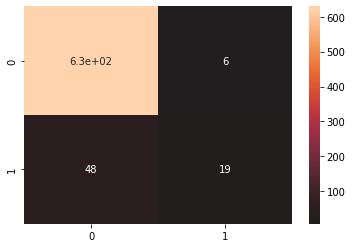

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import time
t1 = time.perf_counter()

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test) 

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

accuracy= accuracy_score(Y_test , Y_pred)

print('Accuracy Score is  = ', accuracy)

conf = confusion_matrix(Y_test , Y_pred)
print('confusion matrix \n',  conf)


sns.heatmap(conf, center = True, annot=True)
plt.show()

- **logistic Regresion**

Accuracy Score is  =  0.9118065433854907
confusion matrix 
 [[625  11]
 [ 51  16]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


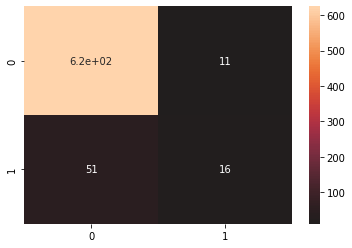

In [ ]:
# Impor library yang dibutuhkan
from sklearn.linear_model import LogisticRegression
t1 = time.perf_counter()

# buat model prediksi
logisticRegr = LogisticRegression(C=0.5, random_state=0)
logisticRegr.fit(X_train, Y_train)
Y_pred = logisticRegr.predict(X_test)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

accuracy= accuracy_score(Y_test , Y_pred)

print('Accuracy Score is  = ', accuracy)

conf = confusion_matrix(Y_test , Y_pred)
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True, annot=True)
plt.show()

- **Random Forest**

Accuracy Score is  =  0.9530583214793741
confusion matrix 
 [[633   3]
 [ 30  37]]


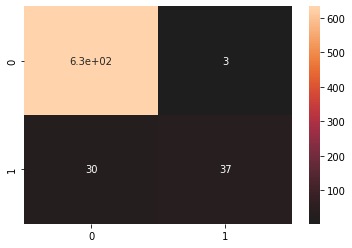

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
t1 = time.perf_counter()

# buat model prediksi
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

accuracy= accuracy_score(Y_test , Y_pred)

print('Accuracy Score is  = ', accuracy)

conf = confusion_matrix(Y_test , Y_pred)
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True, annot=True)
plt.show()

# **6. Evaluasi**

In [ ]:
# Buat variabel F1 yang isinya adalah dataframe nilai F1 data train dan test pada masing-masing algoritma
f1_acc = pd.DataFrame(columns=['train_f1', 'test_f1', 'train_acc', 'test_acc'], index=['KNN','RF','logisticRegr'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'logisticRegr': logisticRegr}
 
# Hitung F1 Score masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    f1_acc.loc[name, 'train_f1'] = f1_score(y_true=Y_train, y_pred=model.predict(X_train), average='weighted')
    f1_acc.loc[name, 'test_f1'] = f1_score(y_true=Y_test, y_pred=model.predict(X_test), average='weighted')
    f1_acc.loc[name, 'train_acc'] = accuracy_score(y_true=Y_train, y_pred=model.predict(X_train))
    f1_acc.loc[name, 'test_acc'] = accuracy_score(y_true=Y_test, y_pred=model.predict(X_test))
 
# Panggil F1
f1_acc

,train_f1,test_f1,train_acc,test_acc
KNN,0.899392,0.90688,0.916785,0.923186
RF,0.997138,0.947624,0.997155,0.953058
logisticRegr,0.873148,0.894386,0.895804,0.911807


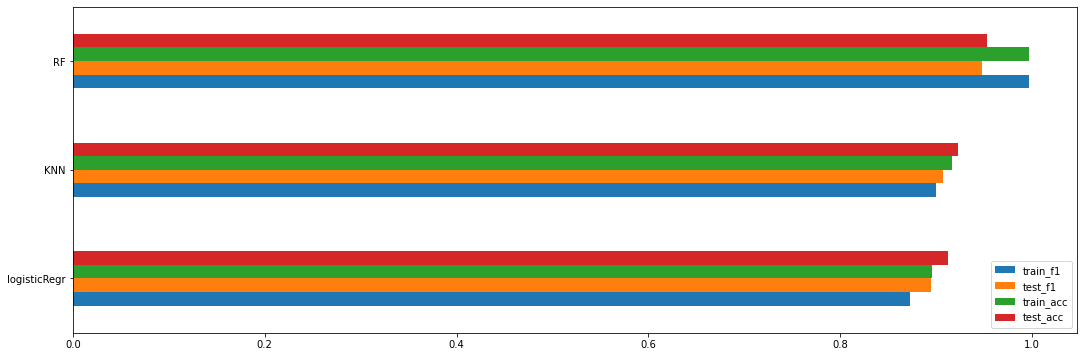

In [ ]:
f1_acc.sort_values(by='test_f1', ascending=True).plot(kind='barh', figsize=(18,6))

Dari analisis diatas menggunakan f1 score dan accuracy, didapatkan hasil terbaik adalah Random Forest dengan nilai f1 score 0.947624 dan nilai accuracy 0.953058. Pengembangan selanjutnya dapat ditambahkan Grid Search sebagai hyperparameter tuning.

In [ ]:
#Melakukan prediksi menggunakan data test menggunakan Random Forest
y_pred = RF.predict(df_test)

In [ ]:
#Memasukan prediksi ke dalam csv
df_test = pd.read_csv(url_test, header=0)
df_test['churn'] = y_pred

In [ ]:
df_test.to_csv('dataset_clean.csv')
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
